### Required Libraries

In [1]:
#Basic and most important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

#Model evaluation tools
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

### Data Exploration

In [2]:
dataset=pd.read_csv("h1n1_vaccine_prediction (2) (1).csv")

In [3]:
dataset.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
dataset.shape  

(26707, 34)

In [5]:
dataset.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [6]:
dataset.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
dataset.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
21666,21666,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Not Married,Own,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
8319,8319,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,NaN,NaN,NaN,NaN,Non-MSA,2.0,3.0,0
20472,20472,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Rent,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
7822,7822,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,White,Male,NaN,Married,Own,Unemployed,"MSA, Not Principle City",1.0,0.0,0
12738,12738,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,0.0,0.0,1
1970,1970,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
11717,11717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,NaN,Not Married,Rent,Unemployed,"MSA, Principle City",0.0,0.0,0
26195,26195,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
22676,22676,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Not Married,Own,Employed,"MSA, Not Principle City",1.0,3.0,0
17521,17521,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",3.0,0.0,0


In [8]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [9]:
corr=dataset.corr()
corr

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280
h1n1_worry,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929
h1n1_awareness,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951
antiviral_medication,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608
contact_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690
bought_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498
wash_hands_frequently,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712
avoid_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822
reduced_outside_home_cont,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768
avoid_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648


<Axes: >

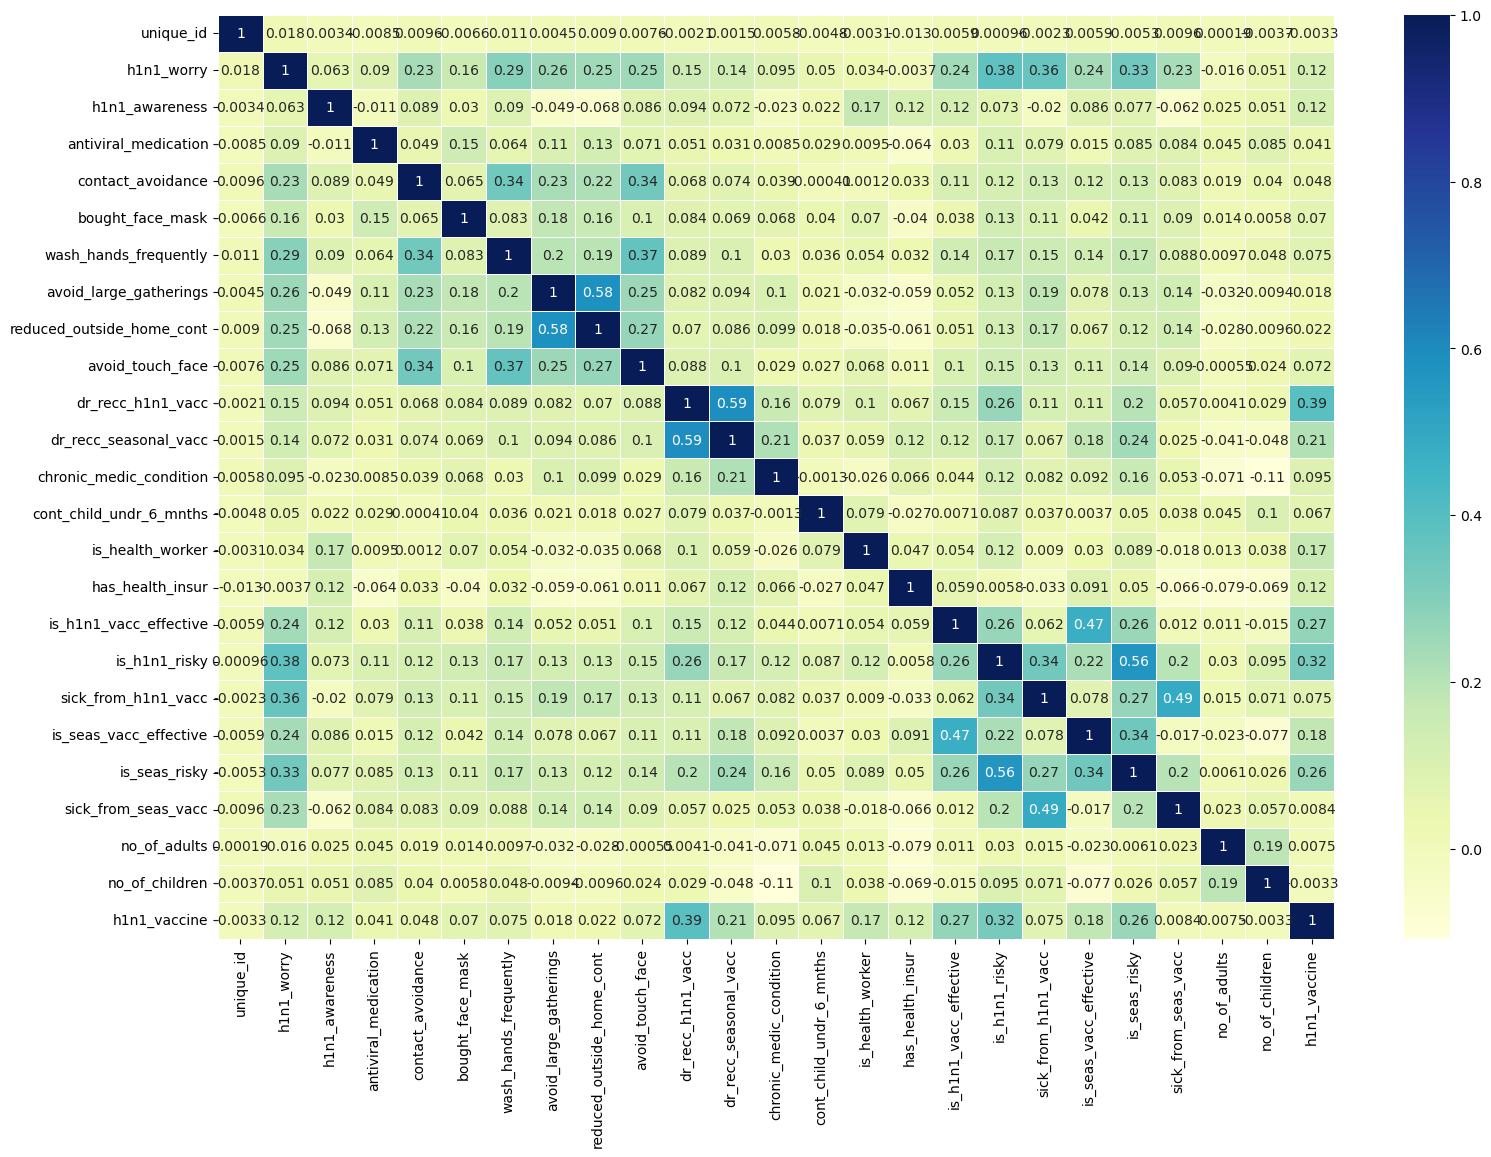

In [10]:
plt.figure(figsize=(18,12))
sns.heatmap(dataset.corr(),annot=True,linewidths=.5,cmap="YlGnBu")

<Axes: >

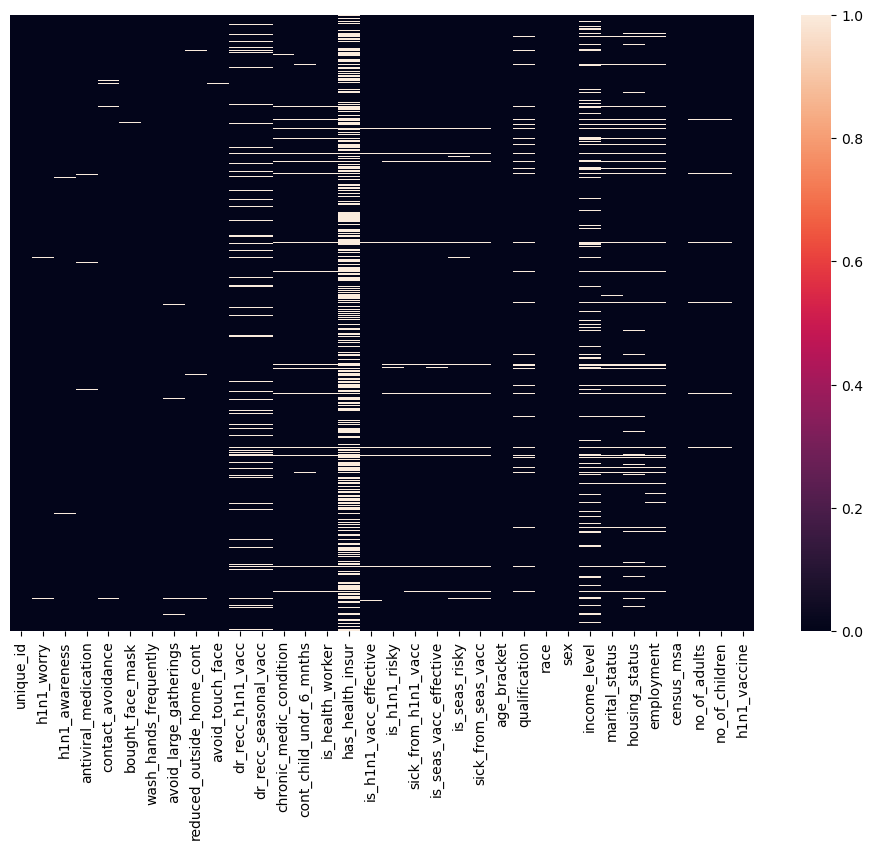

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.isnull(),yticklabels=False)

In [12]:
duplicate=dataset.duplicated()  ## 0 duplicates
print(duplicate.sum())
dataset[duplicate]

0


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine


### Data Cleaning and Visualization

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

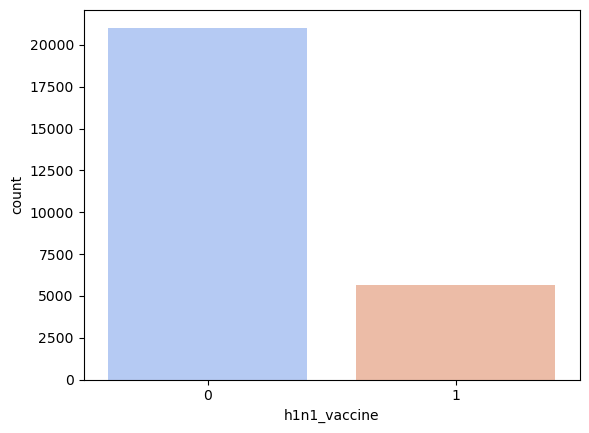

In [13]:
sns.countplot(x="h1n1_vaccine",data=dataset,palette="coolwarm")

In [14]:
pd.crosstab(dataset["h1n1_vaccine"],dataset["h1n1_awareness"])

h1n1_awareness,0.0,1.0,2.0
h1n1_vaccine,,,
0,2145,11945,6849
1,361,2653,2638


In [15]:
dataset["h1n1_worry"].value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

<Axes: xlabel='h1n1_worry', ylabel='count'>

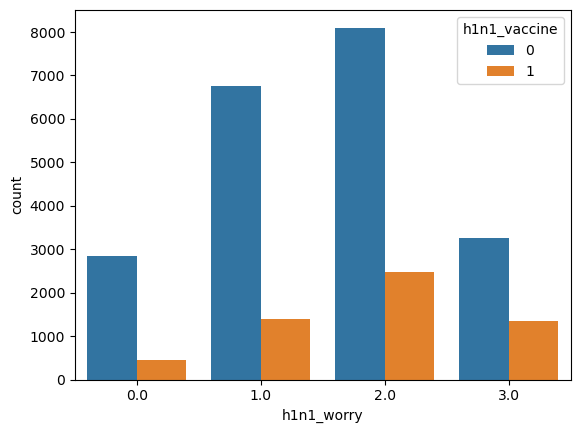

In [16]:
sns.countplot(x="h1n1_worry",hue="h1n1_vaccine",data=dataset)

In [17]:
me=dataset["h1n1_worry"].median()
me

2.0

In [18]:
dataset["h1n1_worry"]=dataset["h1n1_worry"].fillna(me)
dataset.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [19]:
dataset["h1n1_awareness"].value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

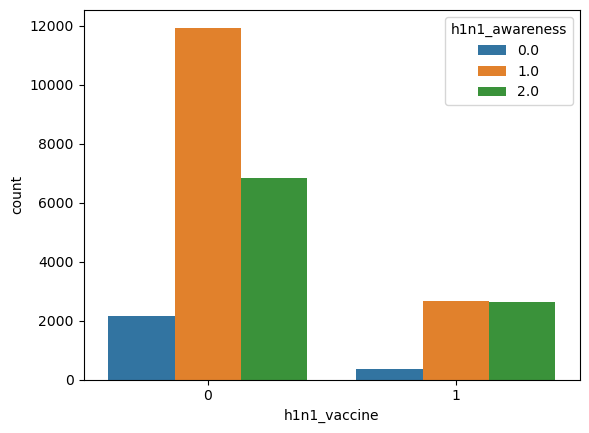

In [20]:
sns.countplot(x="h1n1_vaccine",hue="h1n1_awareness",data=dataset)

In [21]:
dataset["h1n1_awareness"].median()

1.0

In [22]:
dataset["h1n1_awareness"]=dataset["h1n1_awareness"].fillna(dataset["h1n1_awareness"].median())

### simalarly as above all float values are replaced with median

In [23]:
to_be_replaced=['antiviral_medication','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc','no_of_adults','no_of_children']
for x in to_be_replaced:
  dataset[x].fillna(dataset[x].median(),inplace=True)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

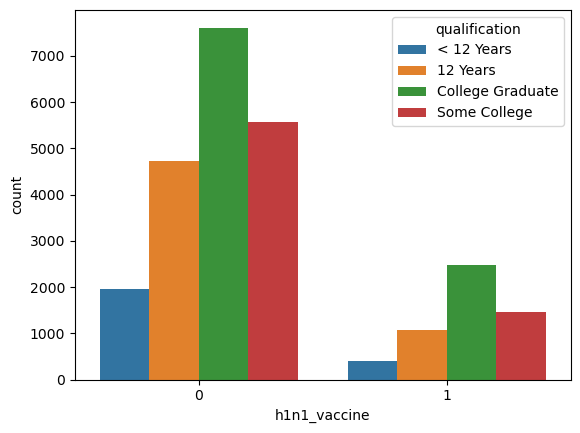

In [24]:
sns.countplot(x="h1n1_vaccine",hue="qualification",data=dataset)

In [25]:
dataset["qualification"].mode()[0]

'College Graduate'

### Simalarly as above all object values are replaced with mode

In [26]:
to_be_replaced=['qualification','income_level','marital_status','housing_status','employment']
for x in to_be_replaced:
  dataset[x].fillna(dataset[x].mode()[0],inplace=True)

In [27]:
dataset.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths          0
is_health_worker                 0
has_health_insur             12274
is_h1n1_vacc_effective           0
is_h1n1_risky                    0
sick_from_h1n1_vacc              0
is_seas_vacc_effective           0
is_seas_risky                    0
sick_from_seas_vacc              0
age_bracket                      0
qualification                    0
race                             0
sex                              0
income_level                     0
marital_status                   0
housing_status      

In [28]:
dataset.dropna(axis=1,inplace=True)

In [29]:
dataset.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

<Axes: >

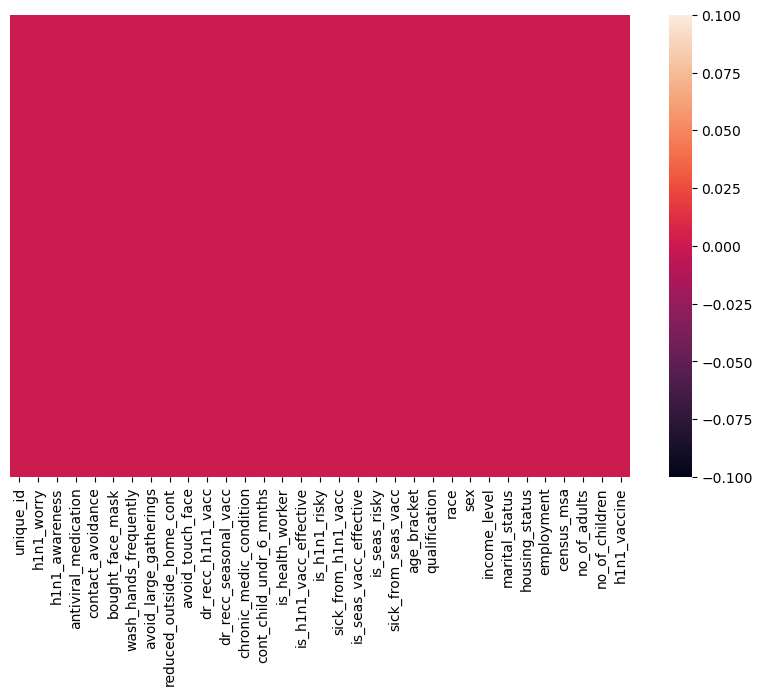

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(),yticklabels=False)

### Training and Testing

In [31]:
le=LabelEncoder()

In [32]:
categ=["age_bracket","qualification","race","sex","marital_status","income_level","housing_status","employment","census_msa"]
dataset[categ]=dataset[categ].apply(le.fit_transform)

In [33]:
model=LogisticRegression()

In [34]:
X=dataset.drop(columns=["h1n1_vaccine","unique_id"])
y=dataset["h1n1_vaccine"]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=3)

In [36]:
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_train_predicted=model.predict(X_train)

In [38]:
y_train_accuracy_score=accuracy_score(y_train,y_train_predicted)
y_train_accuracy_score

0.8354317809501521

In [39]:
y_test_predicted=model.predict(X_test)

In [40]:
y_test_accuracy_score=accuracy_score(y_test,y_test_predicted)
y_test_accuracy_score

0.8345189067764882

### Standardisation and normalisation 

In [41]:
def print_confusion_matrix(y_test,y_predict):
  cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
  df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
  plt.figure(figsize = (7,5))
  sns.heatmap(df_cm, annot=True ,fmt='g')

training set score:  0.835619003042359
test set score:  0.83508049419693
Confusion Matrix:


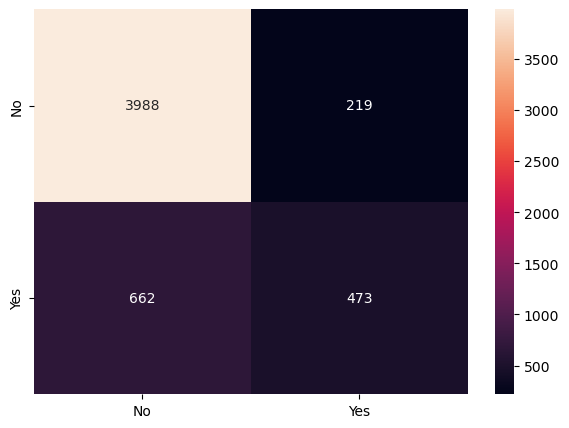

In [42]:
model=LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)
print("training set score: ",model.score(X_train,y_train))
print("test set score: ",model.score(X_test,y_test))
print("Confusion Matrix:")
print_confusion_matrix(y_test,model.predict(X_test))

training set score:  0.8243388719868945
test set score:  0.8281542493448146
Confusion Matrix:


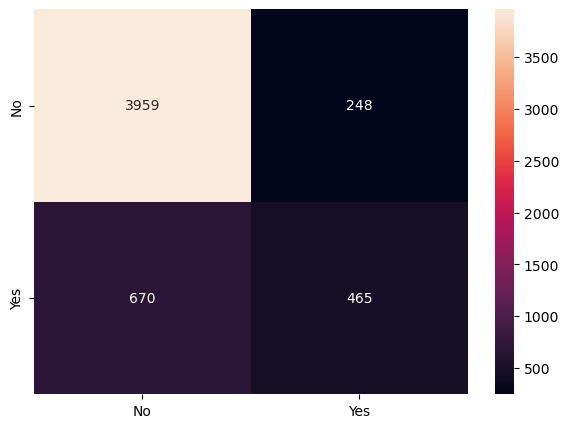

In [43]:
model=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
model.fit(X_train,y_train)
print("training set score: ",model.score(X_train,y_train))
print("test set score: ",model.score(X_test,y_test))
print("Confusion Matrix:")
print_confusion_matrix(y_test,model.predict(X_test))

training set score:  0.8243388719868945
test set score:  0.8281542493448146
Confusion Matrix:


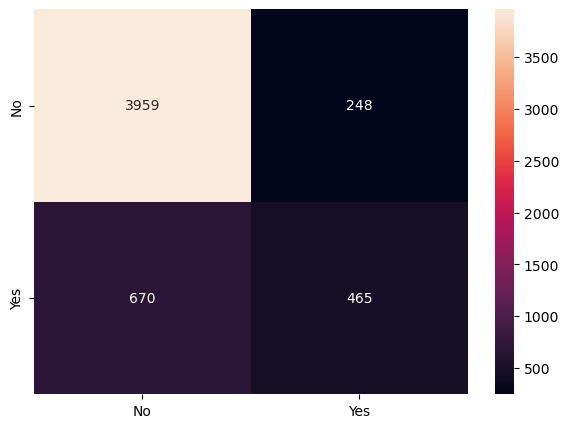

In [44]:
model = BaggingClassifier( n_estimators=150,base_estimator=model,random_state=0)
model = model.fit(X_train,y_train)
print("training set score: ",model.score(X_train,y_train))
print("test set score: ",model.score(X_test,y_test))
print("Confusion Matrix:")
print_confusion_matrix(y_test,model.predict(X_test))

training set score:  0.8346360870582729
test set score:  0.8380756271059528
Confusion Matrix:


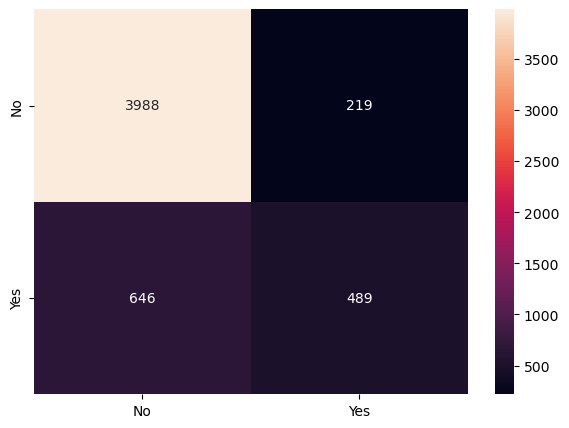

In [45]:
model=AdaBoostClassifier()
model.fit(X_train,y_train)
print("training set score: ",model.score(X_train,y_train))
print("test set score: ",model.score(X_test,y_test))
print("Confusion Matrix:")
print_confusion_matrix(y_test,model.predict(X_test))

training set score:  0.8424994149309618
test set score:  0.8399475851740921
Confusion Matrix:


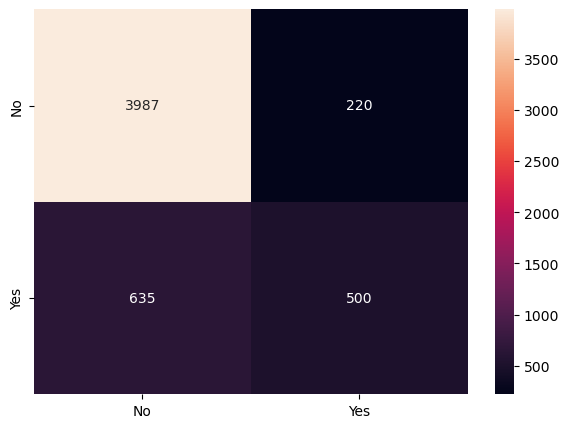

In [46]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
print("training set score: ",model.score(X_train,y_train))
print("test set score: ",model.score(X_test,y_test))
print("Confusion Matrix:")
print_confusion_matrix(y_test,model.predict(X_test))

training set score:  0.8258834542476012
test set score:  0.8253463122426058
Confusion Matrix:


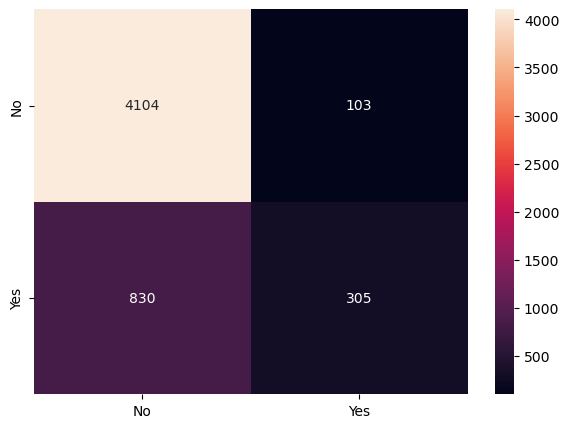

In [47]:
model=RandomForestClassifier(max_depth=5)
model.fit(X_train,y_train)
print("training set score: ",model.score(X_train,y_train))
print("test set score: ",model.score(X_test,y_test))
print("Confusion Matrix:")
print_confusion_matrix(y_test,model.predict(X_test))

training set score:  0.8533582962789609
test set score:  0.8084986896293523
Confusion Matrix:


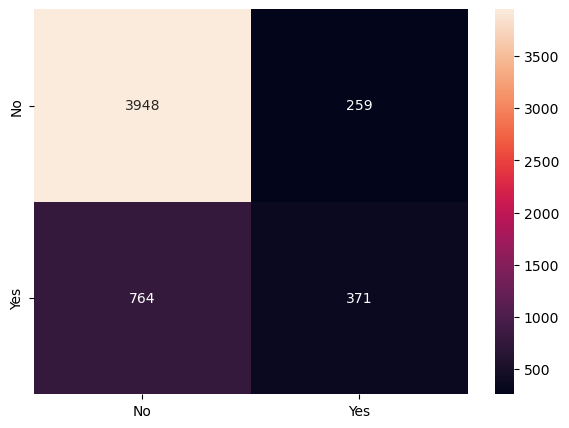

In [48]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
print("training set score: ",model.score(X_train,y_train))
print("test set score: ",model.score(X_test,y_test))
print("Confusion Matrix:")
print_confusion_matrix(y_test,model.predict(X_test))